In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/DOS ALVARENGA PROSABS.dxf', encoding='ANSI_1252')

In [3]:
bairro = 'DOS-ALVARENGA'

In [4]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [5]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [6]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,MCT - RUA FLORESTA,None,AcDbEntity:AcDbPolyline,Continuous,999C53E,None,"LINESTRING (334293.507 7372225.595, 334311.180..."
1,RUA DA EVOLUÃÃO - 10_12_20 - PASTA ETAPA 03 ...,None,AcDbEntity:AcDbPolyline,Continuous,999C53F,None,"LINESTRING (334329.489 7372267.133, 334329.489..."
2,RUA DA EVOLUÃÃO - 10_12_20 - PASTA ETAPA 03 ...,None,AcDbEntity:AcDbPolyline,Continuous,999C540,None,"LINESTRING (334374.396 7372240.787, 334374.396..."
3,RUA 26 DE NOVEMBRO - 10_12_20 - PASTA ETAPA 03...,None,AcDbEntity:AcDbPolyline,Continuous,999C541,None,"LINESTRING (334329.489 7372267.133, 334341.335..."
4,RUA 11 DE JULHO - 10_12_20 - PASTA ETAPA 04 - ...,None,AcDbEntity:AcDbPolyline,Continuous,999C542,None,"LINESTRING (334491.001 7372425.842, 334474.007..."
...,...,...,...,...,...,...,...
361,MCT - RUA MARIA BENVINDA DA COSTA,None,AcDbEntity:AcDbPolyline,Continuous,999C6C2,None,"LINESTRING (338748.464 7373483.833, 338692.776..."
362,RUA BORTOLITO - 09_12_20 - DJI_0024,None,AcDbEntity:AcDbPolyline,Continuous,999C7DB,None,"LINESTRING (339151.229 7372743.960, 339210.144..."
363,AVENIDA PÃROLA NEGRA - 09_12_20 - DJI_0030,None,AcDbEntity:AcDbPolyline,Continuous,999C81D,None,"LINESTRING (339075.393 7373029.977, 339082.663..."
364,VETORIZAÃÃO RUA,None,AcDbEntity:AcDbPolyline,Continuous,999C864,None,"LINESTRING (339127.037 7373351.847, 339134.449..."


In [7]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

In [8]:
# gdf_dxf.Layer.to_list()

<AxesSubplot:>

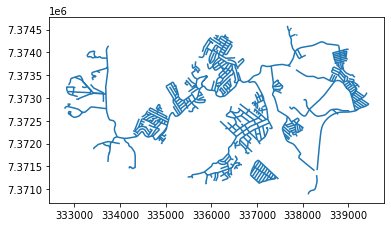

In [9]:
gdf_dxf.plot()

In [10]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('!', '1')

In [11]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [12]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [13]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('DJI_[0-9]{4}')

In [14]:
# gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [15]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [16]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [17]:
gdf_dxf.loc[gdf_dxf['data_voo'].isna(), 'Layer'].to_list()

[' RUA FLORESTA',
 ' RUA MAR DE CORAL',
 ' RUA EVANGELISTA - DJI_0062 PASTA ETAPA 04',
 ' RUA MAURÍCIO GALANTE',
 ' RUA BEIJA-FLOR',
 'RUA ARNALDO LOMBARDI',
 'RUA TENRI',
 'RUA ALBERTINO AUGUSTO VIEIRA',
 'RUA ALBERTINO AUGUSTO VIEIRA',
 ' RUA DAS FLORES',
 ' RUA DA PAZ',
 ' RUA DOS EUCALÍPTOS',
 ' RUA SENADOR LUIS CARLOS PRESTES',
 ' RUA CACILDA BECKER',
 ' RUA PAULO LAZZURI',
 ' RUA 5',
 ' RUA ARMANDO BERTÁGLIA',
 ' RUA OSVALDO PILON',
 ' ALAMEDA DOS PINHEIRAIS',
 ' ALAMEDA DOS PINHEIRAIS',
 ' RUA SÃO JOAQUIM',
 ' RUA TIMOTEO DA SILVA',
 ' RUA TIMOTEO DA SILVA',
 ' RUA TIMOTEO DA SILVA',
 ' RUA TIMOTEO DA SILVA',
 ' ALAMEDA DAS GLICÍNIAS',
 ' ESTRADA ACAMPAMENTO DOS ENGENHEIROS',
 ' ESTRADA LUIZA LOTTO GIANOTTO',
 ' ESTRADA CACONDE',
 '  RUA CARLOS PINA FILHO',
 ' ESTRADA LUIZA LOTTO GIANOTTO',
 ' AVENIDA ANTONIO TONETTO',
 ' AVENIDA JUAREZ TÁVORA',
 ' AVENIDA JUAREZ TÁVORA',
 ' AVENIDA JUAREZ TÁVORA',
 ' AVENIDA JUAREZ TÁVORA',
 ' RUA DOS ANJOS',
 ' AVENIDA ROQUE PETRONI JÚNIOR',
 

In [18]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,RUA FLORESTA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,RUA DA EVOLUÇÃO -,10_12_20,None,- PASTA ETAPA 03 -,None,DJI_0009,,None,None,None,None,None,None,None,None,None
2,RUA DA EVOLUÇÃO -,10_12_20,None,- PASTA ETAPA 03 -,None,DJI_0009,,None,None,None,None,None,None,None,None,None
3,RUA 26 DE NOVEMBRO -,10_12_20,None,- PASTA ETAPA 03 -,None,DJI_0010,,None,None,None,None,None,None,None,None,None
4,RUA 11 DE JULHO -,10_12_20,None,- PASTA ETAPA 04 -,None,DJI_0019,,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,RUA MARIA BENVINDA DA COSTA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
362,RUA BORTOLITO -,09_12_20,None,-,None,DJI_0024,,None,None,None,None,None,None,None,None,None
363,AVENIDA PÉROLA NEGRA -,09_12_20,None,-,None,DJI_0030,,None,None,None,None,None,None,None,None,None
364,VETORIZAÇÃO RUA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [28]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].unique().tolist()

[None,
 ' - PASTA ETAPA 03 - ',
 ' - PASTA ETAPA 04 - ',
 ' - PASTA ETAPA 04 -',
 '- PASTA ETAPA 04 -',
 '  - PASTA ETAPA 04 - ',
 ' PASTA ETAPA 04',
 ' -PASTA ETAPA 01 - ',
 '21 - Mavic - ',
 '21 - Phantom - ',
 '21 - Mavic -  ',
 ' - PASTA ETAPA 01 - ',
 ' - ',
 ' - PASTA ETAPA 02 - ',
 '  - PASTA ETAPA 01 - ',
 '  - PASTA ETAPA 02 - ',
 ' -  PASTA ETAPA 01 - ',
 ' - PASTA ETAPA 01 -',
 '- PASTA ETAPA 03 - ',
 ' - ETAPA 03 - ',
 ' - PASTA ETAPA 02 -',
 '',
 ' -PASTA ETAPA 03 - ']

In [29]:
etapas = {
     ' - PASTA ETAPA 03 - ':'etapa_03',
     ' - PASTA ETAPA 04 - ':'etapa_04',
     ' - PASTA ETAPA 04 -':'etapa_04',
     '- PASTA ETAPA 04 -':'etapa_04',
     '  - PASTA ETAPA 04 - ':'etapa_04',
     ' PASTA ETAPA 04':'etapa_04',
     ' -PASTA ETAPA 01 - ':'etapa_01',
     '21 - Mavic - ':'etapa_00',
     '21 - Phantom - ':'etapa_00',
     '21 - Mavic -  ':'etapa_00',
     ' - PASTA ETAPA 01 - ':'etapa_01',
     ' - ':'etapa_00',
     ' - PASTA ETAPA 02 - ':'etapa_02',
     '  - PASTA ETAPA 01 - ':'etapa_01',
     '  - PASTA ETAPA 02 - ':'etapa_02',
     ' -  PASTA ETAPA 01 - ':'etapa_01',
     ' - PASTA ETAPA 01 -':'etapa_01',
     '- PASTA ETAPA 03 - ':'etapa_03',
     ' - ETAPA 03 - ':'etapa_03',
     ' - PASTA ETAPA 02 -':'etapa_02',
     '':'etapa_00',
     ' -PASTA ETAPA 03 - ':'etapa_03'
}

In [30]:
len(etapas)

22

In [38]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

0           NaN
1      etapa_03
2      etapa_03
3      etapa_03
4      etapa_04
         ...   
361         NaN
362    etapa_00
363    etapa_00
364         NaN
365    etapa_00
Name: 3, Length: 366, dtype: object

In [39]:
gdf_dxf.loc[:, 'etapa'] = gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

In [40]:
gdf_dxf.loc[:, 'etapa']

0           NaN
1      etapa_03
2      etapa_03
3      etapa_03
4      etapa_04
         ...   
361         NaN
362    etapa_00
363    etapa_00
364         NaN
365    etapa_00
Name: etapa, Length: 366, dtype: object

In [41]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,data_voo,logradouro,etapa
0,RUA FLORESTA,None,AcDbEntity:AcDbPolyline,Continuous,999C53E,None,"LINESTRING (334293.507 7372225.595, 334311.180...",[ RUA FLORESTA],[],NaN,RUA FLORESTA,NaN
1,RUA DA EVOLUÇÃO - 10_12_20 - PASTA ETAPA 03 - ...,None,AcDbEntity:AcDbPolyline,Continuous,999C53F,None,"LINESTRING (334329.489 7372267.133, 334329.489...","[RUA DA EVOLUÇÃO, 10_12_20, PASTA ETAPA 03, DJ...",[DJI_0009],10_12_20,RUA DA EVOLUÇÃO,etapa_03
2,RUA DA EVOLUÇÃO - 10_12_20 - PASTA ETAPA 03 - ...,None,AcDbEntity:AcDbPolyline,Continuous,999C540,None,"LINESTRING (334374.396 7372240.787, 334374.396...","[RUA DA EVOLUÇÃO, 10_12_20, PASTA ETAPA 03, DJ...",[DJI_0009],10_12_20,RUA DA EVOLUÇÃO,etapa_03
3,RUA 26 DE NOVEMBRO - 10_12_20 - PASTA ETAPA 03...,None,AcDbEntity:AcDbPolyline,Continuous,999C541,None,"LINESTRING (334329.489 7372267.133, 334341.335...","[RUA 26 DE NOVEMBRO, 10_12_20, PASTA ETAPA 03,...",[DJI_0010],10_12_20,RUA 26 DE NOVEMBRO,etapa_03
4,RUA 11 DE JULHO - 10_12_20 - PASTA ETAPA 04 - ...,None,AcDbEntity:AcDbPolyline,Continuous,999C542,None,"LINESTRING (334491.001 7372425.842, 334474.007...","[RUA 11 DE JULHO, 10_12_20, PASTA ETAPA 04, DJ...",[DJI_0019],10_12_20,RUA 11 DE JULHO,etapa_04
...,...,...,...,...,...,...,...,...,...,...,...,...
361,RUA MARIA BENVINDA DA COSTA,None,AcDbEntity:AcDbPolyline,Continuous,999C6C2,None,"LINESTRING (338748.464 7373483.833, 338692.776...",[ RUA MARIA BENVINDA DA COSTA],[],NaN,RUA MARIA BENVINDA DA COSTA,NaN
362,RUA BORTOLITO - 09_12_20 - DJI_0024,None,AcDbEntity:AcDbPolyline,Continuous,999C7DB,None,"LINESTRING (339151.229 7372743.960, 339210.144...","[RUA BORTOLITO, 09_12_20, DJI_0024]",[DJI_0024],09_12_20,RUA BORTOLITO,etapa_00
363,AVENIDA PÉROLA NEGRA - 09_12_20 - DJI_0030,None,AcDbEntity:AcDbPolyline,Continuous,999C81D,None,"LINESTRING (339075.393 7373029.977, 339082.663...","[AVENIDA PÉROLA NEGRA, 09_12_20, DJI_0030]",[DJI_0030],09_12_20,AVENIDA PÉROLA NEGRA,etapa_00
364,VETORIZAÇÃO RUA,None,AcDbEntity:AcDbPolyline,Continuous,999C864,None,"LINESTRING (339127.037 7373351.847, 339134.449...",[VETORIZAÇÃO RUA],[],NaN,VETORIZAÇÃO RUA,NaN


In [42]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [43]:
pd_videos

,Video_0,Video_1,Video_2,Video_3
0,None,None,None,None
1,DJI_0009.MOV,None,None,None
2,DJI_0009.MOV,None,None,None
3,DJI_0010.MOV,None,None,None
4,DJI_0019.MOV,None,None,None
...,...,...,...,...
361,None,None,None,None
362,DJI_0024.MOV,None,None,None
363,DJI_0030.MOV,None,None,None
364,None,None,None,None


In [44]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [45]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'data_voo', 'logradouro', 'etapa',
       'Video_0', 'Video_1', 'Video_2', 'Video_3'],
      dtype='object')

In [46]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [47]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [48]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [49]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [50]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + bairro.lower().replace('-', '_') + '/' + gdf_dxf.data_voo + gdf_dxf.etapa + gdf_dxf[c]

In [51]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [52]:
gdf_dxf.crs = 'epsg:31983'

In [53]:
gdf_dxf

,Layer,geometry,PaperSpace,SubClasses,Linetype,EntityHandle,Text,lista,DJI,data_voo,logradouro,etapa,Video_0,Video_1,Video_2,Video_3,Video_0_path,Video_1_path,Video_2_path,Video_3_path
0,RUA CARLOS PINA FILHO,"MULTILINESTRING ((333813.914 7372035.673, 3338...",None,AcDbEntity:AcDbPolyline,Continuous,999C5A3,None,[ RUA CARLOS PINA FILHO],[],None,RUA CARLOS PINA FILHO,,None,None,None,None,None,None,None,None
1,ALAMEDA DAS GLICÍNIAS,"LINESTRING (333490.696 7373591.492, 333504.634...",None,AcDbEntity:AcDbPolyline,Continuous,999C59C,None,[ ALAMEDA DAS GLICÍNIAS],[],None,ALAMEDA DAS GLICÍNIAS,,None,None,None,None,None,None,None,None
2,ALAMEDA DOS PINHEIRAIS,"MULTILINESTRING ((333726.015 7373687.528, 3337...",None,AcDbEntity:AcDbPolyline,Continuous,999C590,None,[ ALAMEDA DOS PINHEIRAIS],[],None,ALAMEDA DOS PINHEIRAIS,,None,None,None,None,None,None,None,None
3,AVENIDA ANTONIO TONETTO,"LINESTRING (333635.175 7373093.484, 333636.182...",None,AcDbEntity:AcDbPolyline,Continuous,999C5A5,None,[ AVENIDA ANTONIO TONETTO],[],None,AVENIDA ANTONIO TONETTO,,None,None,None,None,None,None,None,None
4,AVENIDA CARMELO MAMMANA,"LINESTRING (332881.970 7373282.278, 332878.882...",None,AcDbEntity:AcDbPolyline,Continuous,999C5B2,None,[ AVENIDA CARMELO MAMMANA],[],None,AVENIDA CARMELO MAMMANA,,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,RUA ÁGUAS MARINHAS - 09_12_20 - DJI_0019,"LINESTRING (339237.289 7372769.385, 339123.977...",None,AcDbEntity:AcDbPolyline,Continuous,999C678,None,"[RUA ÁGUAS MARINHAS, 09_12_20, DJI_0019]",[DJI_0019],09_12_20/,RUA ÁGUAS MARINHAS,etapa_00/,DJI_0019.MOV,None,None,None,videos/dos_alvarenga/09_12_20/etapa_00/DJI_001...,None,None,None
331,RUA ÍMOLA - 12_12_20 - PASTA ETAPA 02 - DJI_0006,"LINESTRING (338991.365 7373463.891, 338985.557...",None,AcDbEntity:AcDbPolyline,Continuous,999C65B,None,"[RUA ÍMOLA, 12_12_20, PASTA ETAPA 02, DJI_0006]",[DJI_0006],12_12_20/,RUA ÍMOLA,etapa_02/,DJI_0006.MOV,None,None,None,videos/dos_alvarenga/12_12_20/etapa_02/DJI_000...,None,None,None
332,RUA ÔNIX - 09_12_20 - 09_12_20 - DJI_0031,"LINESTRING (339061.821 7373076.430, 339144.744...",None,AcDbEntity:AcDbPolyline,Continuous,999C66B,None,"[RUA ÔNIX, 09_12_20, 09_12_20, DJI_0031]",[DJI_0031],09_12_20/,RUA ÔNIX,etapa_00/,DJI_0031.MOV,None,None,None,videos/dos_alvarenga/09_12_20/etapa_00/DJI_003...,None,None,None
333,RUA ÚNIDOS DOS QUÍMICOS - 10_12_20 - PASTA ETA...,"LINESTRING (334418.739 7372546.695, 334397.063...",None,AcDbEntity:AcDbPolyline,Continuous,999C545,None,"[RUA ÚNIDOS DOS QUÍMICOS, 10_12_20, PASTA ETAP...",[DJI_0011],10_12_20/,RUA ÚNIDOS DOS QUÍMICOS,etapa_04/,DJI_0011.MOV,None,None,None,videos/dos_alvarenga/10_12_20/etapa_04/DJI_001...,None,None,None


In [54]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1)

,geometry,data_voo,logradouro,etapa,Video_0,Video_1,Video_2,Video_3,Video_0_path,Video_1_path,Video_2_path,Video_3_path
0,"MULTILINESTRING ((333813.914 7372035.673, 3338...",None,RUA CARLOS PINA FILHO,,None,None,None,None,None,None,None,None
1,"LINESTRING (333490.696 7373591.492, 333504.634...",None,ALAMEDA DAS GLICÍNIAS,,None,None,None,None,None,None,None,None
2,"MULTILINESTRING ((333726.015 7373687.528, 3337...",None,ALAMEDA DOS PINHEIRAIS,,None,None,None,None,None,None,None,None
3,"LINESTRING (333635.175 7373093.484, 333636.182...",None,AVENIDA ANTONIO TONETTO,,None,None,None,None,None,None,None,None
4,"LINESTRING (332881.970 7373282.278, 332878.882...",None,AVENIDA CARMELO MAMMANA,,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
330,"LINESTRING (339237.289 7372769.385, 339123.977...",09_12_20/,RUA ÁGUAS MARINHAS,etapa_00/,DJI_0019.MOV,None,None,None,videos/dos_alvarenga/09_12_20/etapa_00/DJI_001...,None,None,None
331,"LINESTRING (338991.365 7373463.891, 338985.557...",12_12_20/,RUA ÍMOLA,etapa_02/,DJI_0006.MOV,None,None,None,videos/dos_alvarenga/12_12_20/etapa_02/DJI_000...,None,None,None
332,"LINESTRING (339061.821 7373076.430, 339144.744...",09_12_20/,RUA ÔNIX,etapa_00/,DJI_0031.MOV,None,None,None,videos/dos_alvarenga/09_12_20/etapa_00/DJI_003...,None,None,None
333,"LINESTRING (334418.739 7372546.695, 334397.063...",10_12_20/,RUA ÚNIDOS DOS QUÍMICOS,etapa_04/,DJI_0011.MOV,None,None,None,videos/dos_alvarenga/10_12_20/etapa_04/DJI_001...,None,None,None


In [66]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1', 'Video_2', 'Video_3'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.gpkg', driver='GPKG')

In [69]:
gdf_dxf.to_crs('EPSG:4326').drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1', 'Video_2', 'Video_3'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.geojson', driver='GeoJSON')

In [70]:
gdf_dxf.dtypes

Layer             object
geometry        geometry
PaperSpace        object
SubClasses        object
Linetype          object
EntityHandle      object
Text              object
lista             object
DJI               object
data_voo          object
logradouro        object
etapa             object
Video_0           object
Video_1           object
Video_2           object
Video_3           object
Video_0_path      object
Video_1_path      object
Video_2_path      object
Video_3_path      object
dtype: object

In [61]:
gdf_dxf.Video_0.isna().value_counts()

False    194
True     141
Name: Video_0, dtype: int64